In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

## Pilnas grafas

### Sukuriamas grafas iš visų viršūnių ir briaunų

In [2]:
df = pd.read_csv('edges_pilnas.csv')
Graphtype = nx.MultiDiGraph()
graph = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr='weight', create_using=Graphtype)

### Grafas nagrinėjamas apskaičiuojant įvairius rodiklius

#### Viršūnių laipsniai, viršūnių laipsnių pasiskirstymas

In [3]:
degrees = [val for (node, val) in graph.degree()]

In [4]:
degrees_count = {i:degrees.count(i) for i in degrees}

In [5]:
sorted_values_degrees = sorted(degrees_count.values(), reverse=True) # Sort the values
sorted_dict_degrees = {}

for i in sorted_values_degrees:
    for k in degrees_count.keys():
        if degrees_count[k] == i:
            sorted_dict_degrees[k] = degrees_count[k]
            break

In [6]:
degrees_count_10 = pd.DataFrame(list(sorted_dict_degrees.items())[:10])

In [7]:
degrees_count_10

,0,1
0,1,708
1,3,707
2,2,654
3,4,596
4,5,419
5,6,337
6,7,258
7,9,202
8,8,187
9,10,132


In [8]:
degrees_all = pd.DataFrame(list(sorted_dict_degrees.items()))

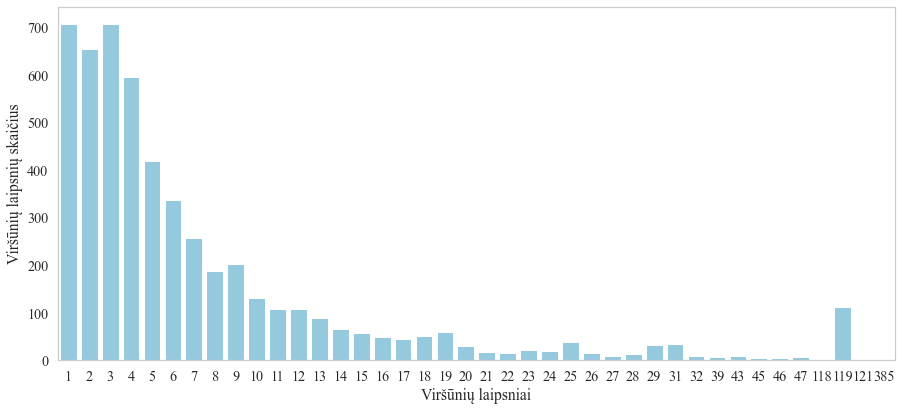

In [9]:
sns.set_theme(style="whitegrid", font_scale=1.3, font="Times New Roman")
f, ax = plt.subplots(figsize=(15, 6.5))
ax.grid(False)
ax = sns.barplot(x=0, y=1, data=degrees_all, color='skyblue')
plt.ylabel('Viršūnių laipsnių skaičius')
plt.xlabel('Viršūnių laipsniai');

In [10]:
virsuniu_statistika = scipy.stats.describe(degrees)

In [11]:
virsunes = pd.DataFrame([virsuniu_statistika], columns=virsuniu_statistika._fields)

In [12]:
virsunes

,nobs,minmax,mean,variance,skewness,kurtosis
0,5366,"(1, 385)",10.299292,403.585711,5.315163,41.368719


#### https://www.geeksforgeeks.org/scipy-stats-skew-python/

c:\users\ruta\desktop\studijos\4 semestras\02. python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 5.315163
Kurtosis: 41.368719


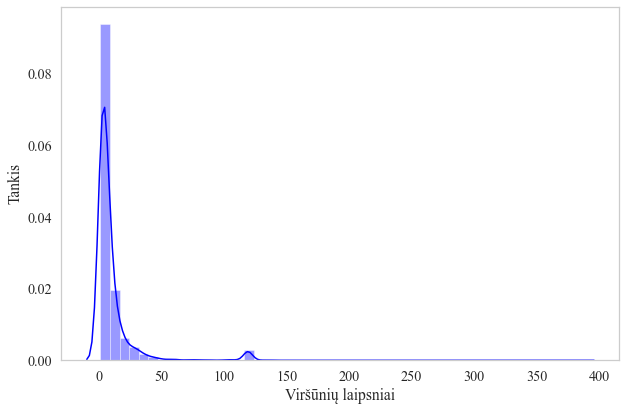

In [13]:
sns.set_theme(style="whitegrid", font_scale=1.3, font="Times New Roman")
f, ax = plt.subplots(figsize=(10, 6.5))
ax.grid(False)
sns.distplot( degrees, color='blue')
print("Skewness: %f" % scipy.stats.skew(degrees))
print("Kurtosis: %f" % scipy.stats.kurtosis(degrees))
plt.ylabel('Tankis')
plt.xlabel('Viršūnių laipsniai');

#### Grafo jungumo matai

### https://stackoverflow.com/questions/56624273/understanding-average-degree-connectivity-in-networkx

In [14]:
average_degree_connectivity = nx.average_degree_connectivity(graph)

In [15]:
df_degree = pd.DataFrame(list(average_degree_connectivity.items()))

In [16]:
df_degree

,0,1
0,3,17.255540
1,45,12.871111
2,15,15.743860
3,14,13.000000
4,119,61.171934
...,...,...
78,58,20.051724
79,91,7.956044
80,102,13.754902
81,41,4.878049


In [17]:
#connectivity = nx.average_node_connectivity(graph)

Text(0.5, 0, 'Viršūnių laipsniai')

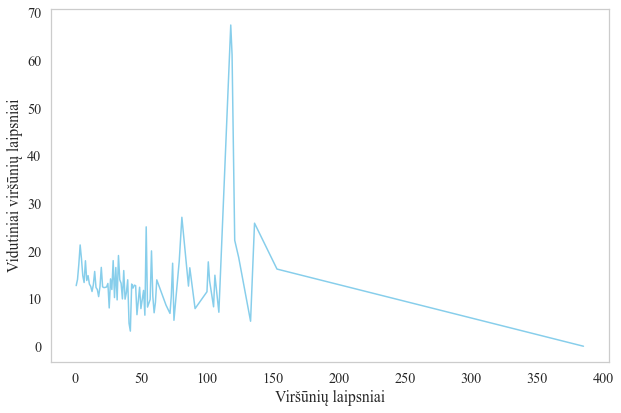

In [18]:
sns.set_theme(style="whitegrid", font_scale=1.3, font="Times New Roman")
f, ax = plt.subplots(figsize=(10, 6.5))
ax.grid(False)
plt.plot(*zip(*sorted(average_degree_connectivity.items())), color='skyblue')
plt.ylabel('Vidutiniai viršūnių laipsniai')
plt.xlabel('Viršūnių laipsniai')

In [19]:
average_neighbor_degree = nx.average_neighbor_degree(graph)

Text(0.5, 0, 'Viršūnės')

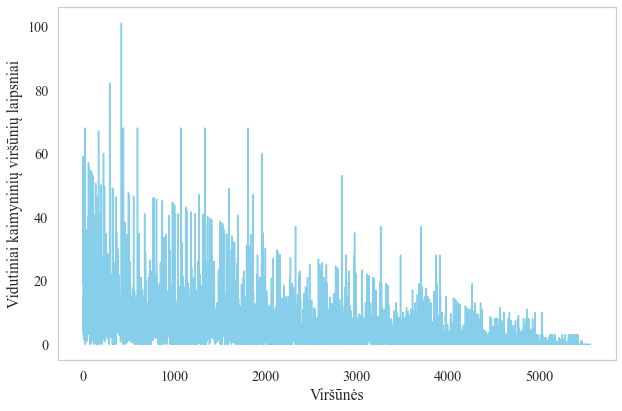

In [20]:
sns.set_theme(style="whitegrid", font_scale=1.3, font="Times New Roman")
f, ax = plt.subplots(figsize=(10, 6.5))
ax.grid(False)
plt.plot(*zip(*sorted(average_neighbor_degree.items())), color='skyblue')
plt.ylabel('Vidutiniai kaimyninių viršūnių laipsniai')
plt.xlabel('Viršūnės')

#### Laipsnių koreliacija

#### https://ona-book.org/similarity.html

In [21]:
nx.degree_assortativity_coefficient(graph).round(3)

0.298

In [22]:
nx.degree_pearson_correlation_coefficient(graph).round(3)

0.298

#### Grafo skersmuo 

#### This finds the maximum distance of a list containing the shortest paths between any two nodes in G (computed with Dijkstra's algorithm), regardless of what component they may belong to. Technically, diameter is infinite for disconnected graphs which is why NetworkX's built-in method does not work. The method above will find the largest diameter amongst all components within G, but is not the diameter of G itself.

In [23]:
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(graph)])

In [24]:
diameter

14

#### Grafo tankumas

In [25]:
nx.density(graph)

0.0009598594443145705

### Centriškumo matai

#### Laipsnio centriškumo matas – svarbiausi tinklo nariai

In [26]:
pavardes = pd.read_excel('autoriu_pavardes.xlsx')

In [27]:
centriskumas = nx.degree_centrality(graph)

In [28]:
sorted_values_c = sorted(centriskumas.values(), reverse=True) # Sort the values
sorted_dict_c = {}

for i in sorted_values_c:
    for k in centriskumas.keys():
        if centriskumas[k] == i:
            sorted_dict_c[k] = centriskumas[k]
            break

In [29]:
centriskumas_10 = pd.DataFrame(list(sorted_dict_c.items())[:10])

In [30]:
centriskumas_10 = pd.merge(centriskumas_10, pavardes, how='left' ,left_on=0, right_on='index')

In [31]:
centriskumas_10 = centriskumas_10[['authors', 1]].rename(columns = {'authors' : 'Autorius', 1 : 'Laipsnio centriškumo matas'}, 
                                                             inplace = False).round(3)

In [32]:
centriskumas_10

,Autorius,Laipsnio centriškumo matas
0,"Zavadskas, E. K.",0.072
1,"Kaklauskas, A.",0.029
2,"Liakina, V.",0.025
3,"Turskis, Z.",0.025
4,"Antuchevičienė, J.",0.023
5,"Razavi, S. H.",0.023
6,"Abaalkhail, F.",0.022
7,"Hunsi, R.",0.022
8,"Paršeliūnas, E. K.",0.020
9,"Gribniak, V.",0.020


#### Artumo centriškumo matas – nariai, esantys arčiausiai kitų narių

In [33]:
artumas = nx.closeness_centrality(graph)

In [34]:
sorted_values_a = sorted(artumas.values(), reverse=True) # Sort the values
sorted_dict_a = {}

for i in sorted_values_a:
    for k in artumas.keys():
        if artumas[k] == i:
            sorted_dict_a[k] = artumas[k]
            break

In [35]:
artumas_10 = pd.DataFrame(list(sorted_dict_a.items())[:10])

In [36]:
artumas_10 = pd.merge(artumas_10, pavardes, how='left' ,left_on=0, right_on='index')

In [37]:
artumas_10 = artumas_10[['authors', 1]].rename(columns = {'authors' : 'Autorius', 1 : 'Laipsnio centriškumo matas'}, 
                                                             inplace = False).round(3)

In [38]:
artumas_10

,Autorius,Laipsnio centriškumo matas
0,"Zavadskas, E. K.",0.188
1,"Žemeckytė, L.",0.143
2,"Zolfani, S.",0.140
3,"Zhou, W.",0.138
4,"Turskis, Z.",0.102
5,"Vilutienė, T.",0.099
6,"Vinogradova, I.",0.097
7,"Zakarevičius, A.",0.093
8,"Yazdani-Chamzini, A.",0.092
9,"Ustinovičius, L.",0.091


#### Tarpusavio centriškumo matas – nariai, turintys daugiausiai trumpiausių ryšių su kitais nariais

In [39]:
tarpusavio = nx.betweenness_centrality(graph)

In [40]:
sorted_values_t = sorted(tarpusavio.values(), reverse=True) # Sort the values
sorted_dict_t = {}

for i in sorted_values_t:
    for k in tarpusavio.keys():
        if tarpusavio[k] == i:
            sorted_dict_t[k] = tarpusavio[k]
            break

In [41]:
tarpusavio_10 = pd.DataFrame(list(sorted_dict_t.items())[:10])

In [42]:
tarpusavio_10 = pd.merge(tarpusavio_10, pavardes, how='left' ,left_on=0, right_on='index')

In [43]:
tarpusavio_10 = tarpusavio_10[['authors', 1]].rename(columns = {'authors' : 'Autorius', 1 : 'Laipsnio centriškumo matas'}, 
                                                             inplace = False).round(3)

In [44]:
tarpusavio_10

,Autorius,Laipsnio centriškumo matas
0,"Jučiūtė, E.",0.004
1,"Kačianauskas, R.",0.004
2,"Kaklauskas, A.",0.003
3,"Kilikevičius, A.",0.002
4,"Turskis, Z.",0.001
5,"Prentkovskis, O.",0.001
6,"Kaklauskas, G.",0.001
7,"Gribniak, V.",0.001
8,"Laurinavičius, A.",0.001
9,"Matijošius, J.",0.001


## Grafas, iki 20 bendraautorių

In [45]:
df = pd.read_csv('edges_adj.csv')
Graphtype = nx.MultiDiGraph()
graph = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr='weight', create_using=Graphtype)

#### Viršūnių laipsniai, viršūnių laipsnių pasiskirstymas

In [46]:
degrees = [val for (node, val) in graph.degree()]

In [47]:
degrees_count = {i:degrees.count(i) for i in degrees}

In [48]:
sorted_values_degrees = sorted(degrees_count.values(), reverse=True) # Sort the values
sorted_dict_degrees = {}

for i in sorted_values_degrees:
    for k in degrees_count.keys():
        if degrees_count[k] == i:
            sorted_dict_degrees[k] = degrees_count[k]
            break

In [49]:
degrees_count_10 = pd.DataFrame(list(sorted_dict_degrees.items())[:10])

In [50]:
degrees_count_10

,0,1
0,1,708
1,3,707
2,2,657
3,4,598
4,5,419
5,6,337
6,7,258
7,9,205
8,8,188
9,10,132


In [51]:
degrees_all = pd.DataFrame(list(sorted_dict_degrees.items()))

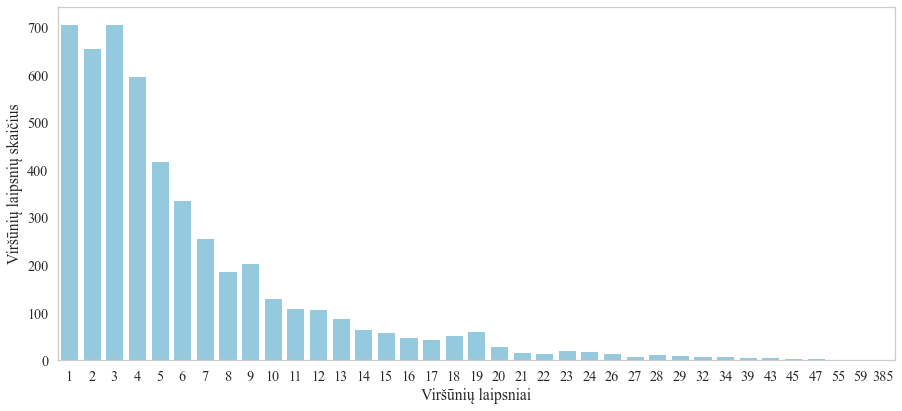

In [52]:
sns.set_theme(style="whitegrid", font_scale=1.3, font="Times New Roman")
f, ax = plt.subplots(figsize=(15, 6.5))
ax.grid(False)
ax = sns.barplot(x=0, y=1, data=degrees_all, color='skyblue')
plt.ylabel('Viršūnių laipsnių skaičius')
plt.xlabel('Viršūnių laipsniai');

In [53]:
virsuniu_statistika = scipy.stats.describe(degrees)

In [54]:
virsunes = pd.DataFrame([virsuniu_statistika], columns=virsuniu_statistika._fields)

In [55]:
virsunes

,nobs,minmax,mean,variance,skewness,kurtosis
0,5182,"(1, 385)",7.439213,124.692212,10.879169,275.213975


#### https://www.geeksforgeeks.org/scipy-stats-skew-python/

c:\users\ruta\desktop\studijos\4 semestras\02. python\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 10.879169
Kurtosis: 275.213975


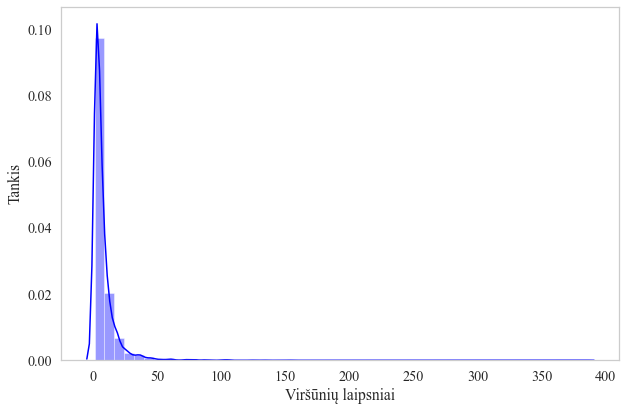

In [56]:
sns.set_theme(style="whitegrid", font_scale=1.3, font="Times New Roman")
f, ax = plt.subplots(figsize=(10, 6.5))
ax.grid(False)
sns.distplot( degrees, color='blue')
print("Skewness: %f" % scipy.stats.skew(degrees))
print("Kurtosis: %f" % scipy.stats.kurtosis(degrees))
plt.ylabel('Tankis')
plt.xlabel('Viršūnių laipsniai');

#### Grafo jungumo matai

In [57]:
average_degree_connectivity = nx.average_degree_connectivity(graph)

In [58]:
df_degree = pd.DataFrame(list(average_degree_connectivity.items()))

In [59]:
df_degree

,0,1
0,3,17.156530
1,45,12.444444
2,15,14.984181
3,14,12.557359
4,6,14.407023
...,...,...
74,91,7.637363
75,102,13.558824
76,41,4.878049
77,100,11.490000


In [60]:
#connectivity = nx.average_node_connectivity(graph)

Text(0.5, 0, 'Viršūnių laipsniai')

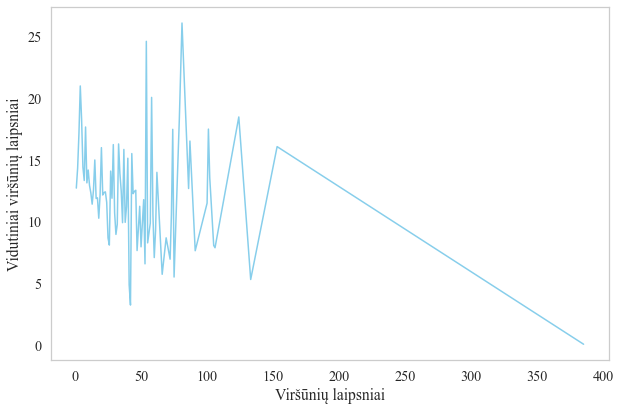

In [61]:
sns.set_theme(style="whitegrid", font_scale=1.3, font="Times New Roman")
f, ax = plt.subplots(figsize=(10, 6.5))
ax.grid(False)
plt.plot(*zip(*sorted(average_degree_connectivity.items())), color='skyblue')
plt.ylabel('Vidutiniai viršūnių laipsniai')
plt.xlabel('Viršūnių laipsniai')

In [62]:
average_neighbor_degree = nx.average_neighbor_degree(graph)

Text(0.5, 0, 'Viršūnės')

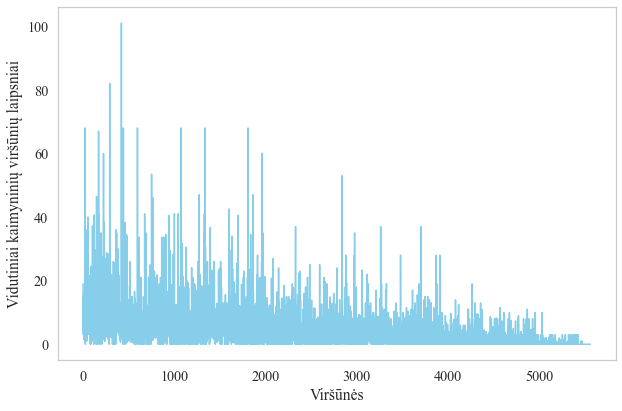

In [63]:
sns.set_theme(style="whitegrid", font_scale=1.3, font="Times New Roman")
f, ax = plt.subplots(figsize=(10, 6.5))
ax.grid(False)
plt.plot(*zip(*sorted(average_neighbor_degree.items())), color='skyblue')
plt.ylabel('Vidutiniai kaimyninių viršūnių laipsniai')
plt.xlabel('Viršūnės')

#### Laipsnių koreliacija

In [64]:
nx.degree_assortativity_coefficient(graph).round(3)

-0.066

In [65]:
nx.degree_pearson_correlation_coefficient(graph).round(3)

-0.066

#### Grafo skersmuo 

In [66]:
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(graph)])

In [67]:
diameter

14

#### Grafo tankumas

In [68]:
nx.density(graph)

0.0007179321230655221

### Centriškumo matai

#### Laipsnio centriškumo matas – svarbiausi tinklo nariai

In [69]:
pavardes = pd.read_excel('autoriu_pavardes.xlsx')

In [70]:
centriskumas = nx.degree_centrality(graph)

In [71]:
sorted_values_c = sorted(centriskumas.values(), reverse=True) # Sort the values
sorted_dict_c = {}

for i in sorted_values_c:
    for k in centriskumas.keys():
        if centriskumas[k] == i:
            sorted_dict_c[k] = centriskumas[k]
            break

In [72]:
centriskumas_10 = pd.DataFrame(list(sorted_dict_c.items())[:10])

In [73]:
centriskumas_10 = pd.merge(centriskumas_10, pavardes, how='left' ,left_on=0, right_on='index')

In [74]:
centriskumas_10 = centriskumas_10[['authors', 1]].rename(columns = {'authors' : 'Autorius', 1 : 'Laipsnio centriškumo matas'}, 
                                                             inplace = False).round(3)

In [75]:
centriskumas_10

,Autorius,Laipsnio centriškumo matas
0,"Zavadskas, E. K.",0.074
1,"Kaklauskas, A.",0.030
2,"Turskis, Z.",0.026
3,"Antuchevičienė, J.",0.024
4,"Prentkovskis, O.",0.020
5,"Kačianauskas, R.",0.020
6,"Kilikevičius, A.",0.020
7,"Jučiūtė, E.",0.019
8,"Matijošius, J.",0.019
9,"Rimkus, A.",0.018


#### Artumo centriškumo matas – nariai, esantys arčiausiai kitų narių 

In [76]:
artumas = nx.closeness_centrality(graph)

In [77]:
sorted_values_a = sorted(artumas.values(), reverse=True) # Sort the values
sorted_dict_a = {}

for i in sorted_values_a:
    for k in artumas.keys():
        if artumas[k] == i:
            sorted_dict_a[k] = artumas[k]
            break

In [78]:
artumas_10 = pd.DataFrame(list(sorted_dict_a.items())[:10])

In [79]:
artumas_10 = pd.merge(artumas_10, pavardes, how='left' ,left_on=0, right_on='index')

In [80]:
artumas_10 = artumas_10[['authors', 1]].rename(columns = {'authors' : 'Autorius', 1 : 'Laipsnio centriškumo matas'}, 
                                                             inplace = False).round(3)

In [81]:
artumas_10

,Autorius,Laipsnio centriškumo matas
0,"Zavadskas, E. K.",0.183
1,"Žemeckytė, L.",0.140
2,"Zolfani, S.",0.137
3,"Zhou, W.",0.136
4,"Turskis, Z.",0.103
5,"Vilutienė, T.",0.100
6,"Vinogradova, I.",0.099
7,"Zakarevičius, A.",0.094
8,"Yazdani-Chamzini, A.",0.093
9,"Ustinovičius, L.",0.093


#### Tarpusavio centriškumo matas – nariai, turintys daugiausiai trumpiausių ryšių su kitais nariais

In [82]:
tarpusavio = nx.betweenness_centrality(graph)

In [83]:
sorted_values_t = sorted(tarpusavio.values(), reverse=True) # Sort the values
sorted_dict_t = {}

for i in sorted_values_t:
    for k in tarpusavio.keys():
        if tarpusavio[k] == i:
            sorted_dict_t[k] = tarpusavio[k]
            break

In [84]:
tarpusavio_10 = pd.DataFrame(list(sorted_dict_t.items())[:10])

In [85]:
tarpusavio_10 = pd.merge(tarpusavio_10, pavardes, how='left' ,left_on=0, right_on='index')

In [86]:
tarpusavio_10 = tarpusavio_10[['authors', 1]].rename(columns = {'authors' : 'Autorius', 1 : 'Laipsnio centriškumo matas'}, 
                                                             inplace = False).round(3)

In [87]:
tarpusavio_10

,Autorius,Laipsnio centriškumo matas
0,"Jučiūtė, E.",0.004
1,"Kačianauskas, R.",0.004
2,"Kaklauskas, A.",0.003
3,"Kilikevičius, A.",0.002
4,"Turskis, Z.",0.002
5,"Prentkovskis, O.",0.001
6,"Laurinavičius, A.",0.001
7,"Kaklauskas, G.",0.001
8,"Matijošius, J.",0.001
9,"Kliukas, R.",0.001
